In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
url = "https://storage.googleapis.com/didow-ml-datasets/a-z-handwritten-data.zip"
if not os.path.exists('a-z-handwritten-data.zip'):
    filename = wget.download(url)

In [3]:
local_zip = 'a-z-handwritten-data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./Dataset/')
zip_ref.close()

In [4]:
data = pd.read_csv('Dataset/A_Z Handwritten Data.csv')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_labels = np.array(data.iloc[:,0].values)
data_letters = np.array(data.iloc[:,1:].values)

In [7]:
data_letters.shape

(372450, 784)

In [8]:
undersampler = RandomUnderSampler(sampling_strategy='all')
letters, labels = undersampler.fit_resample(data_letters, data_labels)
print(letters.shape, labels.shape)

(29120, 784) (29120,)


In [9]:
Counter(labels)

Counter({0: 1120,
         1: 1120,
         2: 1120,
         3: 1120,
         4: 1120,
         5: 1120,
         6: 1120,
         7: 1120,
         8: 1120,
         9: 1120,
         10: 1120,
         11: 1120,
         12: 1120,
         13: 1120,
         14: 1120,
         15: 1120,
         16: 1120,
         17: 1120,
         18: 1120,
         19: 1120,
         20: 1120,
         21: 1120,
         22: 1120,
         23: 1120,
         24: 1120,
         25: 1120})

In [10]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(letters,
                                                  labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [12]:
x_train = reshape_normalize(x_train)
x_test = reshape_normalize(x_test)

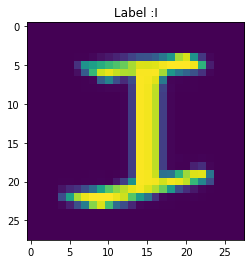

In [13]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [14]:
y_train = np_utils.to_categorical(y_train, 26)
y_test = np_utils.to_categorical(y_test, 26)

In [15]:
print('training set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)


training set:  (23296, 28, 28, 1) (23296, 26)
test set:  (5824, 28, 28, 1) (5824, 26)


In [16]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [17]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 20, verbose=1)

Epoch 1/20
583/583 [==============================] - 4s 3ms/step - loss: 1.0672 - accuracy: 0.6858 - val_loss: 0.2710 - val_accuracy: 0.9264
Epoch 2/20
583/583 [==============================] - 2s 3ms/step - loss: 0.4254 - accuracy: 0.8727 - val_loss: 0.1808 - val_accuracy: 0.9479
Epoch 3/20
583/583 [==============================] - 2s 3ms/step - loss: 0.3158 - accuracy: 0.9082 - val_loss: 0.1686 - val_accuracy: 0.9504
Epoch 4/20
583/583 [==============================] - 2s 3ms/step - loss: 0.2664 - accuracy: 0.9205 - val_loss: 0.1432 - val_accuracy: 0.9579
Epoch 5/20
583/583 [==============================] - 2s 3ms/step - loss: 0.2302 - accuracy: 0.9300 - val_loss: 0.1440 - val_accuracy: 0.9601
Epoch 6/20
583/583 [==============================] - 2s 3ms/step - loss: 0.2200 - accuracy: 0.9319 - val_loss: 0.1335 - val_accuracy: 0.9646
Epoch 7/20
583/583 [==============================] - 2s 3ms/step - loss: 0.1930 - accuracy: 0.9402 - val_loss: 0.1334 - val_accuracy: 0.9648
Epoch 

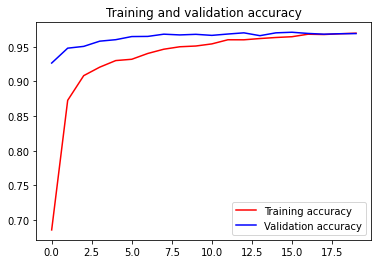

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

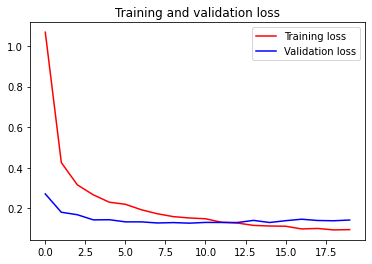

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

182/182 - 0s - loss: 0.0968 - accuracy: 0.9765 - 273ms/epoch - 1ms/step
Test Loss:  0.09682328253984451
Test Accuracy:  0.9764766693115234


In [25]:
list_letters = []
for i in range(len(y_test)):
    ltr = letters[np.argmax(y_test[i])]
    if ltr == 'K':
        list_letters.append(i)

1/1 [==============================] - 0s 11ms/step


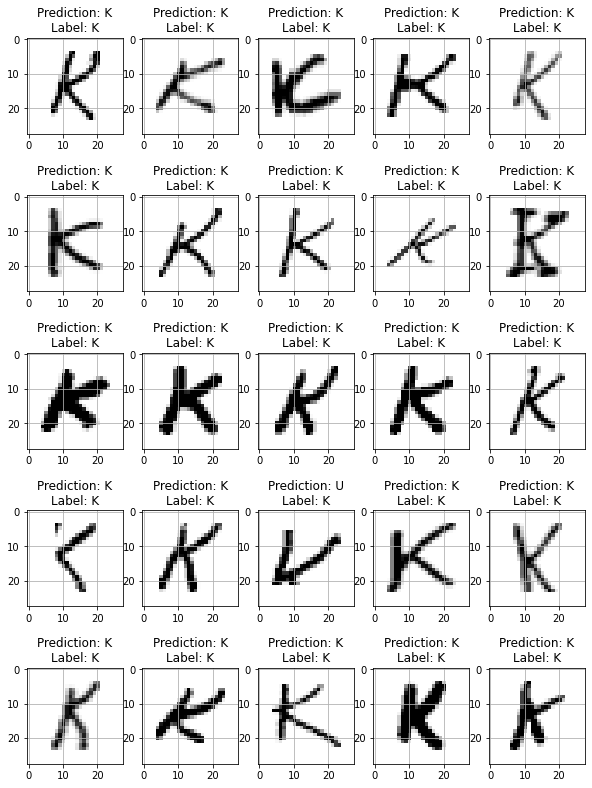

In [26]:
fig, axes = plt.subplots(5,5, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    n = list_letters[i]
    img = np.reshape(x_test[n], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(pred,letters[np.argmax(y_test[n])]))
    ax.grid()

In [27]:
model_version = '6'
model_name = 'az_handwritten'
save_path = "./Model/{}/{}".format(model_name, model_version)
model.save(save_path)

INFO:tensorflow:Assets written to: ./Model/az_handwritten/6\assets


INFO:tensorflow:Assets written to: ./Model/az_handwritten/6\assets


In [24]:
# save_path = "./Model/{}/{}/{}".format(model_name, model_version, file_name)
# tf.saved_model.save(model, save_path)
